In [34]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file1=pd.read_csv("ResaleFlatPricesBasedonApprovalDate19901999.csv")
file2=pd.read_csv("ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
file3=pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
file4=pd.read_csv("ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
file5=pd.read_csv("ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [26]:
#Concatenating all files into single data frame
df=pd.concat([file1,file2,file3,file4,file5],axis=0,ignore_index=True)

In [6]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [7]:
df.shape

(927465, 11)

In [8]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [9]:
df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
remaining_lease         object
dtype: object

In [10]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,927465.000000,927465.000000,9.274650e+05
mean,95.691236,1988.278012,3.208481e+05
std,25.824985,10.664813,1.705229e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.930000e+05
50%,93.000000,1986.000000,2.975000e+05
75%,113.000000,1996.000000,4.180000e+05
max,307.000000,2020.000000,1.588000e+06


In [11]:
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [13]:
df['remaining_lease'].unique()

array([nan, 70, 65, 64, 63, 62, 69, 60, 61, 86, 77, 80, 90, 87, 66, 58,
       94, 71, 68, 84, 73, 79, 76, 72, 82, 74, 67, 88, 81, 89, 53, 54, 55,
       57, 93, 83, 85, 92, 91, 59, 95, 52, 51, 56, 75, 96, 78, 50, 97, 49,
       48, '61 years 04 months', '60 years 07 months',
       '62 years 05 months', '62 years 01 month', '63 years',
       '61 years 06 months', '58 years 04 months', '59 years 08 months',
       '59 years 06 months', '60 years', '62 years 08 months', '61 years',
       '60 years 10 months', '59 years 03 months', '61 years 05 months',
       '60 years 04 months', '62 years', '60 years 03 months',
       '63 years 09 months', '61 years 01 month', '61 years 10 months',
       '58 years 06 months', '59 years 04 months', '62 years 11 months',
       '60 years 08 months', '93 years 08 months', '93 years 07 months',
       '60 years 01 month', '94 years 08 months', '78 years 04 months',
       '60 years 06 months', '62 years 06 months', '58 years',
       '70 years 08 mont

In [28]:
#Converting str values to float
def convert_to_years(yr_str):
    if pd.notna(yr_str) and isinstance(yr_str,str):
        if 'years' in yr_str:
            yr_split = yr_str.split()
            years=float(yr_split[0])
            if len(yr_split)>2:
                months=float(yr_split[2])
            else:
                months=0
            return years+months/12        
df['remaining_lease']=df['remaining_lease'].apply(convert_to_years)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 927465 non-null  object 
 1   flat_type            927465 non-null  object 
 2   block                927465 non-null  object 
 3   storey_range         927465 non-null  object 
 4   floor_area_sqm       927465 non-null  float64
 5   flat_model           927465 non-null  object 
 6   lease_commence_date  927465 non-null  int64  
 7   resale_price         927465 non-null  float64
 8   year                 927465 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 60.1+ MB


In [49]:
#Dropping unecessary columns
df.drop(columns=['remaining_lease','street_name'],axis=1,inplace=True)

In [52]:
#Splitting column into two columns year and month
df['year'], df['month'] = pd.to_datetime(df['month'], format='%Y-%m').dt.year, pd.to_datetime(df['month'], format='%Y-%m').dt.month

In [55]:
df['year'].corr(df['resale_price'])

0.6749372136067942

In [56]:
df['month'].corr(df['resale_price'])

0.004162860457822417

In [57]:
df.drop(columns=['month'],axis=1,inplace=True)

In [62]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [64]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [66]:
df['block'].unique()

array(['309', '216', '211', ..., '460C', '240A', '460D'], dtype=object)

In [67]:
df.drop(columns=['block'],axis=1,inplace=True)

In [70]:
df['storey_range'].unique()

array(['10 TO 12', '04 TO 06', '07 TO 09', '01 TO 03', '13 TO 15',
       '19 TO 21', '16 TO 18', '25 TO 27', '22 TO 24', '28 TO 30',
       '31 TO 33', '40 TO 42', '37 TO 39', '34 TO 36', '06 TO 10',
       '01 TO 05', '11 TO 15', '16 TO 20', '21 TO 25', '26 TO 30',
       '36 TO 40', '31 TO 35', '46 TO 48', '43 TO 45', '49 TO 51'],
      dtype=object)

In [73]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [76]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [79]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [81]:
df['resale_price'].nunique()

9524

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927465 entries, 0 to 927464
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 927465 non-null  object 
 1   flat_type            927465 non-null  object 
 2   storey_range         927465 non-null  object 
 3   floor_area_sqm       927465 non-null  float64
 4   flat_model           927465 non-null  object 
 5   lease_commence_date  927465 non-null  int64  
 6   resale_price         927465 non-null  float64
 7   year                 927465 non-null  int32  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 53.1+ MB


In [ ]:
#Seperating features as numerical and categorical
category_col = ['town','flat_type','storey_range','flat_model']
numerical_col = ['floor_area_sqm','lease_commence_date','year']

Dealing with outliers and skewness

<Axes: ylabel='floor_area_sqm'>

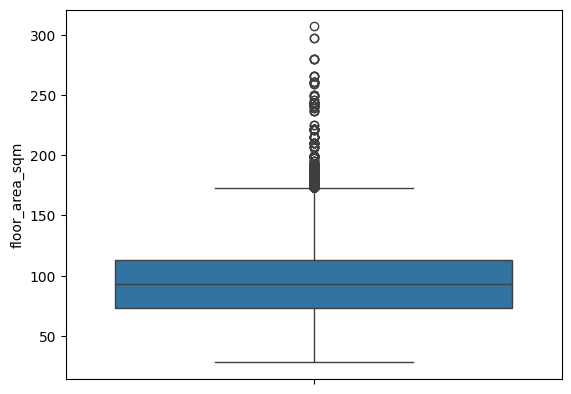

In [83]:
sns.boxplot(data=df['floor_area_sqm'])

<Axes: xlabel='floor_area_sqm', ylabel='Count'>

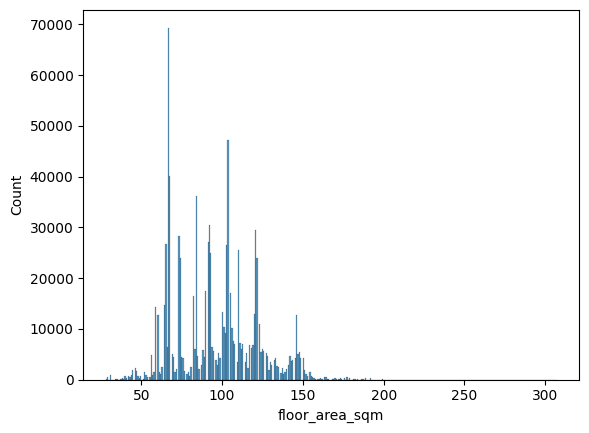

In [87]:
sns.histplot(data=df['floor_area_sqm'])

<Axes: ylabel='lease_commence_date'>

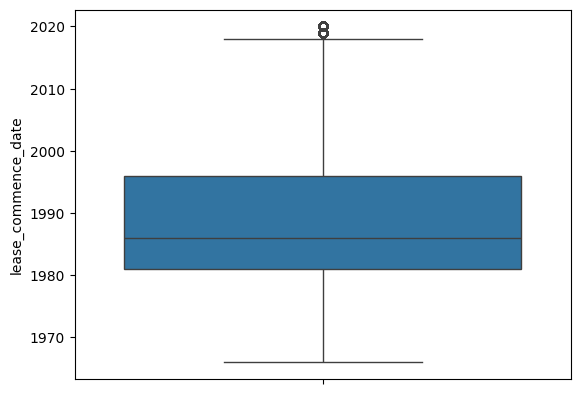

In [84]:
sns.boxplot(data=df['lease_commence_date'])

<Axes: xlabel='lease_commence_date', ylabel='Count'>

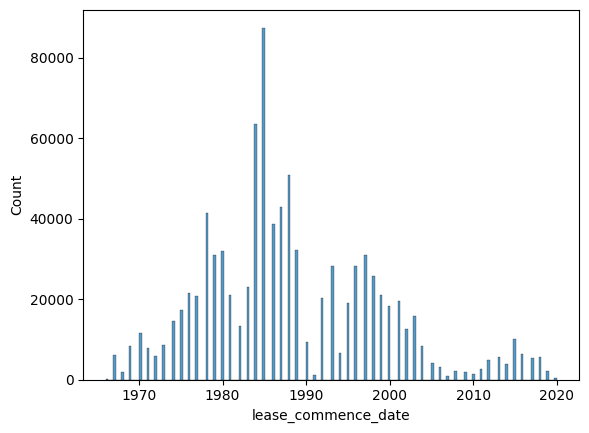

In [88]:
sns.histplot(data=df['lease_commence_date'])

<Axes: ylabel='year'>

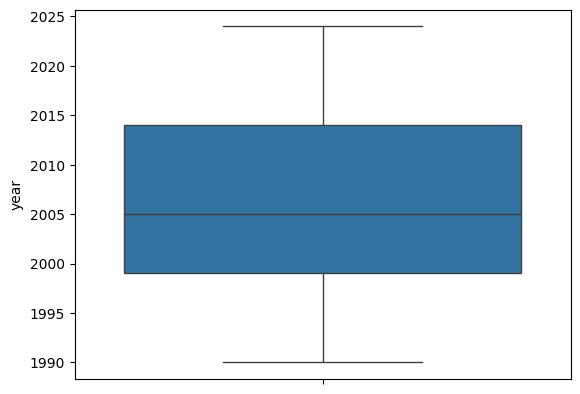

In [85]:
sns.boxplot(data=df['year'])

<Axes: xlabel='year', ylabel='Count'>

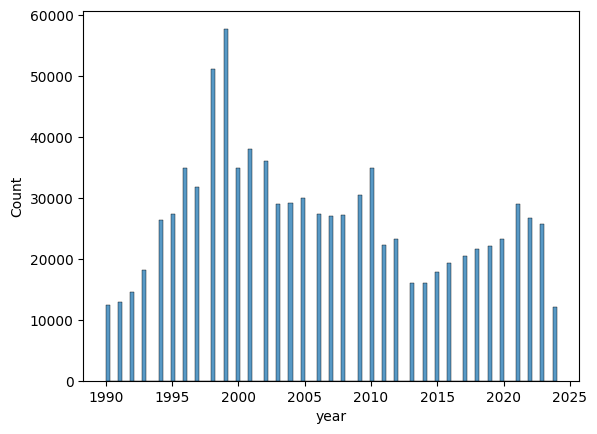

In [89]:
sns.histplot(data=df['year'])

<Axes: ylabel='resale_price'>

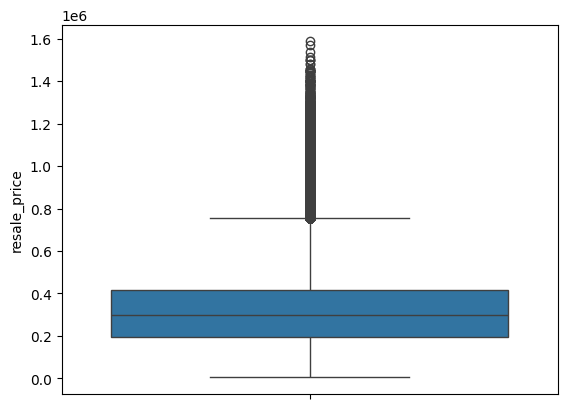

In [86]:
sns.boxplot(data=df['resale_price'])

<Axes: xlabel='resale_price', ylabel='Count'>

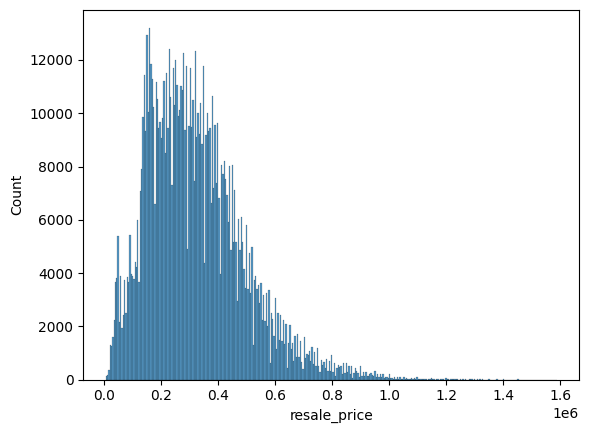

In [90]:
sns.histplot(data=df['resale_price'])

In [91]:
df['resale_price_log'] = np.log(df['resale_price'])

<Axes: xlabel='resale_price_log', ylabel='Count'>

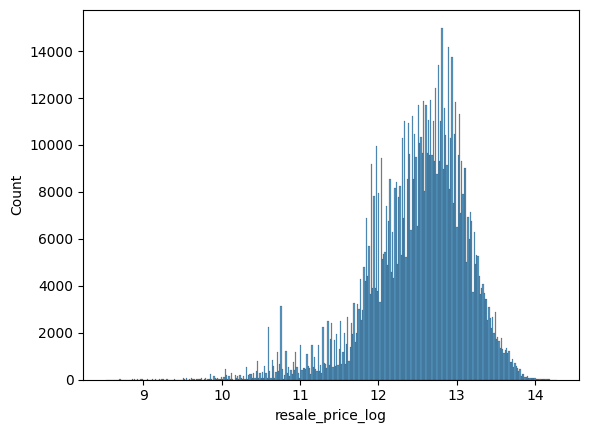

In [92]:
sns.histplot(data=df['resale_price_log'])

In [93]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

In [94]:
outlier(df, 'floor_area_sqm')
outlier(df, 'resale_price_log')
outlier(df, 'lease_commence_date')

<Axes: ylabel='floor_area_sqm'>

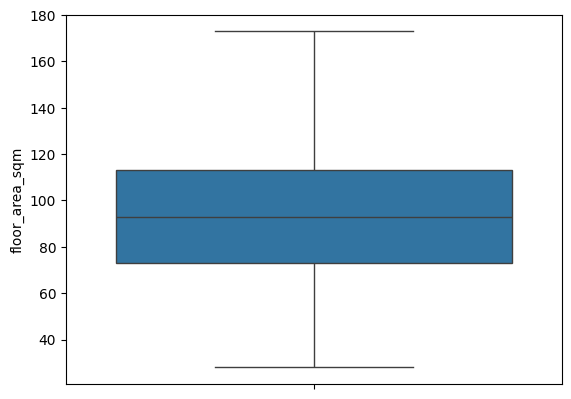

In [95]:
sns.boxplot(data=df['floor_area_sqm'])

<Axes: ylabel='resale_price_log'>

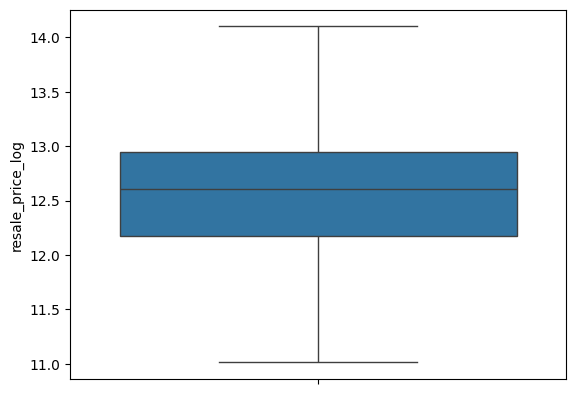

In [96]:
sns.boxplot(data=df['resale_price_log'])

<Axes: xlabel='resale_price_log', ylabel='Count'>

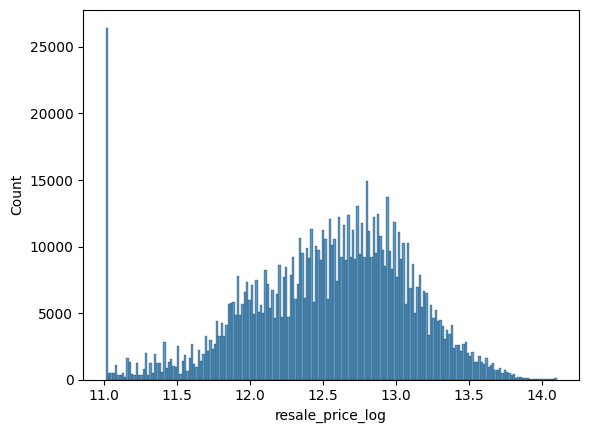

In [97]:
sns.histplot(data=df['resale_price_log'])

<Axes: ylabel='lease_commence_date'>

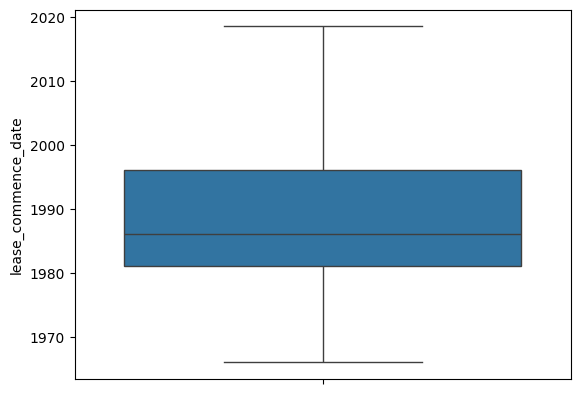

In [98]:
sns.boxplot(data=df['lease_commence_date'])

In [99]:
df.drop(columns = ['resale_price'], axis =1, inplace = True)

In [100]:
df.to_csv('data_preprocessed.csv', index=False) 

MODEL SELECTION

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
# from sklearn.externals import joblib  # Import joblib from sklearn.externals (if using older scikit-learn)
from joblib import dump, load 

In [38]:
df=pd.read_csv("data_preprocessed.csv")

In [48]:
df['floor_area_sqm'].max()

173.0

In [3]:
category_col = ['town','flat_type','storey_range','flat_model']
numerical_col = ['floor_area_sqm','lease_commence_date','year']

In [6]:
#Encoding categorical features using onehotencoder
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[category_col])
encoded_categorical_cols = encoder.get_feature_names_out(category_col)
encoded_categorical_df1 = pd.DataFrame(encoded_categorical_data, columns=encoded_categorical_cols)

In [127]:
#picling the encoder
with open('encoder.pkl', 'wb') as f:
    # Pickle the encoder object
    pickle.dump(encoder, f)

print("Encoder pickled successfully!")

Encoder pickled successfully!


In [7]:
# Scaling numerical features
scaler_features = StandardScaler()
X_encoded_scaled = scaler_features.fit_transform(df[numerical_col])

# Scaling target variable
scaler_target = StandardScaler()
y_scaled = scaler_target.fit_transform(df[['resale_price_log']])

In [128]:
#pickling standard scaler
with open('scaler_features.pkl', 'wb') as f:
    pickle.dump(scaler_features, f)
print("Scaler for numerical features pickled successfully!")

# Pickle scaler for target variable
with open('scaler_target.pkl', 'wb') as f:
    pickle.dump(scaler_target, f)
print("Scaler for target variable pickled successfully!")

Scaler for numerical features pickled successfully!
Scaler for target variable pickled successfully!


In [8]:
# Combine scaled numerical data with encoded categorical data
X_encoded_combined1 = pd.concat([pd.DataFrame(X_encoded_scaled, columns=numerical_col), encoded_categorical_df1], axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_combined1, y_scaled, test_size=0.2, random_state=42)

In [120]:
#Linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate root mean squared error
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Absolute Error (MAE): 0.30546076257685595
Mean Squared Error (MSE): 0.16150264063432468
Root Mean Squared Error (RMSE): 0.40187391136315964
R-squared: 0.8391876548932607


In [11]:
#Decision tree regressor model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate root mean squared error
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

Mean Absolute Error (MAE): 0.11715521659675465
Mean Squared Error (MSE): 0.02876866224105558
Root Mean Squared Error (RMSE): 0.1696132725969745
R-squared: 0.9713543009427141


In [12]:
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(model, f)
    print("DecisionTree model pickled successfully!")

# # Load the pickled model (optional)
# with open("decision_tree_model.pkl", "rb") as f:
#     loaded_model = pickle.load(f)

DecisionTree model pickled successfully!


In [125]:
#Random forest regressor model
model = RandomForestRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate root mean squared error
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

c:\Users\SANGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error (MAE): 0.1076197787972491
Mean Squared Error (MSE): 0.023593168562953605
Root Mean Squared Error (RMSE): 0.15360067891436419
R-squared: 0.9765076734955824


In [10]:
# Import XGBoost regressor
from xgboost import XGBRegressor

# Define XGBoost model with some initial parameters
model = XGBRegressor(objective='reg:squarederror', max_depth=5, eta=0.1)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluation metrics (same as random forest)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate root mean squared error
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)


Mean Absolute Error (MAE): 0.14342604686366536
Mean Squared Error (MSE): 0.03548178787745532
Root Mean Squared Error (RMSE): 0.1883661006589437
R-squared: 0.9646698685870232


In [137]:
#pickling the model
from joblib import dump

# ... rest of your code ...

# Saving the model
dump(model, 'random_forest_model.pkl')
print("Random forest regressor model saved successfully!")

Random forest regressor model saved successfully!


In [19]:
#Final decision tree model
category_col = ['town','flat_type','storey_range','flat_model']
numerical_col = ['floor_area_sqm','lease_commence_date','year']

#Encoding categorical data
encoder = OneHotEncoder(sparse_output=False)
encoded_categorical_data = encoder.fit_transform(df[category_col])
encoded_categorical_cols = encoder.get_feature_names_out(category_col)
encoded_categorical_df1 = pd.DataFrame(encoded_categorical_data, columns=encoded_categorical_cols)

#picling the encoder
with open('encoder.pkl', 'wb') as f:
    # Pickle the encoder object
    pickle.dump(encoder, f)

print("Encoder pickled successfully!")

# Scaling numerical features
scaler_features = StandardScaler()
X_encoded_scaled = scaler_features.fit_transform(df[numerical_col])

#pickling standard scaler
with open('scaler_features.pkl', 'wb') as f:
    pickle.dump(scaler_features, f)
print("Scaler for numerical features pickled successfully!")

# Scaling target variable
scaler_target = StandardScaler()
y_scaled = scaler_target.fit_transform(df[['resale_price_log']])


# Pickle scaler for target variable
with open('scaler_target.pkl', 'wb') as f:
    pickle.dump(scaler_target, f)
print("Scaler for target variable pickled successfully!")

# Combine scaled numerical data with encoded categorical data
X_encoded_combined1 = pd.concat([pd.DataFrame(X_encoded_scaled, columns=numerical_col), encoded_categorical_df1], axis=1)

#splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_encoded_combined1, y_scaled, test_size=0.2, random_state=42)

#Decision tree regressor model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate root mean squared error
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r2)

#Pickling the model
with open("decision_tree_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("DecisionTree model pickled successfully!")

Encoder pickled successfully!
Scaler for numerical features pickled successfully!
Scaler for target variable pickled successfully!
Mean Absolute Error (MAE): 0.11719363662785928
Mean Squared Error (MSE): 0.02880799251906077
Root Mean Squared Error (RMSE): 0.1697291740363476
R-squared: 0.9713151387704124
DecisionTree model pickled successfully!


In [49]:
#Compressed decision tree model file
import gzip
with gzip.open("dtm.pkl.gz", 'wb') as f:
  # Pickle the data and write it to the compressed file
  pickle.dump(model, f)

In [37]:
#Prediction of resale price for new data
import pandas as pd
import numpy as np
import pickle

# Assuming you have your new data in a DataFrame named 'new_data'
new_data = pd.DataFrame({
  'town':['ANG MO KIO'],
  'flat_type':['3 ROOM'],
  'storey_range':['07 TO 09'],
  'flat_model':['New Generation'],
  'floor_area_sqm':[68.0],
  'lease_commence_date':[1981.0],
  'year':[2015]
})

# Load the encoder, scalers, and model from pickle files
category_col = ['town','flat_type','storey_range','flat_model']
numerical_col = ['floor_area_sqm','lease_commence_date','year']

with open('encoder.pkl', 'rb') as f:
  encoder = pickle.load(f)

with open('scaler_features.pkl', 'rb') as f:
  scaler_features = pickle.load(f)

with open('scaler_target.pkl', 'rb') as f:
  scaler_target = pickle.load(f)

with open("decision_tree_model.pkl", "rb") as f:
  model = pickle.load(f)

# Preprocess new data (similar to the training process)
categorical_data = new_data[category_col]
numerical_data = new_data[numerical_col]

# Encode categorical data
encoded_categorical_data = encoder.transform(categorical_data)

# Scale numerical data
scaled_numerical_data = scaler_features.transform(numerical_data)

# Combine preprocessed data
preprocessed_data = np.concatenate((encoded_categorical_data, scaled_numerical_data), axis=1)

# Predict resale price
predicted_price = model.predict(preprocessed_data)  # Get the first prediction (assuming single data point)
predicted_price_scaled = np.array([predicted_price])
predicted_price_original_scale = scaler_target.inverse_transform(predicted_price_scaled)
resale_price = np.exp(predicted_price_original_scale) 


# Print the predicted resale price
# print("Predicted resale price:", resale_price[0,0])
print("Predicted resale price: {:.2f}".format(resale_price[0, 0]))

Predicted resale price: 275000.00


c:\Users\SANGAVI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [159]:
new_data_dict = {
    'town':['ANG MO KIO'],
    'flat_type':['3 ROOM'],
    'storey_range':['07 TO 09'],
    'flat_model':['New Generation'],
    'floor_area_sqm':[68.0],
    'lease_commence_date':[1981.0],
    'year':[2015]
}

# Convert the dictionary to a DataFrame
new_data = pd.DataFrame(new_data_dict)
print(new_data.dtypes)

town                    object
flat_type               object
storey_range            object
flat_model              object
floor_area_sqm         float64
lease_commence_date    float64
year                     int64
dtype: object


In [158]:
df.dtypes

town                    object
flat_type               object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date    float64
year                     int64
resale_price_log       float64
dtype: object